<a href="https://colab.research.google.com/github/lamisghoualmi/Chronic-Kidney-disease-Data-analysis-and-Prediction/blob/main/Kidney_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

****
**Objective of my work**:
Performing an exploratory data analysis and building  machine learning models.
****
**Probleme encountred**:
The data contains a lot of missing values. How to deal with this missing values? How an  imputation technique (replacing missing values by zero, constant, mean, median, most frequent value, etc.) will impact the accuracy of a machine learning model? 
****
The aim of this work is to respond to these questions.
****

**Import packages**

In [49]:
import numpy as np
import pandas  as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

**EXPLORATORY DATA ANALYSIS**

**Read the dataset, then checks columns informations and check the statiscital desritption of the continious variables**

**Metadata:**
age : age |
bp :blood pressure  |
sg : specific gravity  |
al : albumin  |
su : sugar  |
rbc : red blood cells|
pc :pus cell |
pcc : pus cell clumps |
ba : bacteria |
bgr : blood glucose random |
bu : blood urea |
sc : serum creatinine |
sod : sodium |
pot : potassium |
hemo : hemoglobin |
pcv : packed cell volume |
wc : white blood cell count |
rc : red blood cell count |
htn : hypertension |
dm : diabetes mellitus |
cad : coronary artery disease |
appet : appetite |
pe : pedal edema |
ane : anemia |
class : class.

In [58]:

df = pd.read_csv('kidney_disease.csv', index_col=0)
print(df.head())
print('Size of the dataset:',df.shape)
print('Variables informations')
df.info()
print('statiscital desritption of the continious variables')
df.describe()



     age    bp     sg   al   su     rbc        pc         pcc          ba  \
id                                                                          
0   48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1    7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2   62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3   48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4   51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

      bgr  ...  pcv    wc   rc  htn   dm cad appet   pe  ane classification  
id         ...                                                               
0   121.0  ...   44  7800  5.2  yes  yes  no  good   no   no            ckd  
1     NaN  ...   38  6000  NaN   no   no  no  good   no   no            ckd  
2   423.0  ...   31  7500  NaN   no  yes  no  poor   no  yes            ckd  
3   117.0  ...   32  6700  3.9  yes   no  no  poor  yes  yes          

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


**Check for missing values for each variables**

In [51]:
#Remove duplicates from the dataset
df=df.drop_duplicates()
print('new df size', df.shape)
#------------------Check percentage of missing values for each variables----
for col in df.columns:
    PercentageMissing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(PercentageMissing *100)))

new df size (400, 25)
age - 2%
bp - 3%
sg - 12%
al - 12%
su - 12%
rbc - 38%
pc - 16%
pcc - 1%
ba - 1%
bgr - 11%
bu - 5%
sc - 4%
sod - 22%
pot - 22%
hemo - 13%
pcv - 18%
wc - 26%
rc - 32%
htn - 0%
dm - 0%
cad - 0%
appet - 0%
pe - 0%
ane - 0%
classification - 0%


**Remove spaces from categoricals values** (Example 'yes' and ' yes', they are considered as two diffrent categories due to the space added in some columns values)

In [59]:
cols = df.columns
num_cols = df._get_numeric_data().columns
Categ_cols=list(set(cols) - set(num_cols))
lenght=len(Categ_cols)
for i in range (lenght):
  df[Categ_cols[i]]=df[Categ_cols[i]].str.strip()


**Statiscital descritpion and visualization of the categorical variables**

____________________________________________________________________________________
Variable name: ane
Unique values are: ['no' 'yes' nan]
Number of unique values: 2
Frequency of each unique value in a catagorical variable:
no     339
yes     60
Name: ane, dtype: int64
____________________________________________________________________________________
Variable name: rc
Unique values are: ['5.2' nan '3.9' '4.6' '4.4' '5' '4.0' '3.7' '3.8' '3.4' '2.6' '2.8' '4.3'
 '3.2' '3.6' '4' '4.1' '4.9' '2.5' '4.2' '4.5' '3.1' '4.7' '3.5' '6.0'
 '5.0' '2.1' '5.6' '2.3' '2.9' '2.7' '8.0' '3.3' '3.0' '3' '2.4' '4.8' '?'
 '5.4' '6.1' '6.2' '6.3' '5.1' '5.8' '5.5' '5.3' '6.4' '5.7' '5.9' '6.5']
Number of unique values: 49
Frequency of each unique value in a catagorical variable:
5.2    18
4.5    16
4.9    14
4.7    11
4.8    10
3.9    10
4.6     9
3.4     9
5.9     8
5.5     8
6.1     8
5.0     8
3.7     8
5.3     7
5.8     7
5.4     7
3.8     7
5.6     6
4.3     6
4.2     6
3.2     5
4.4     5
5.7   

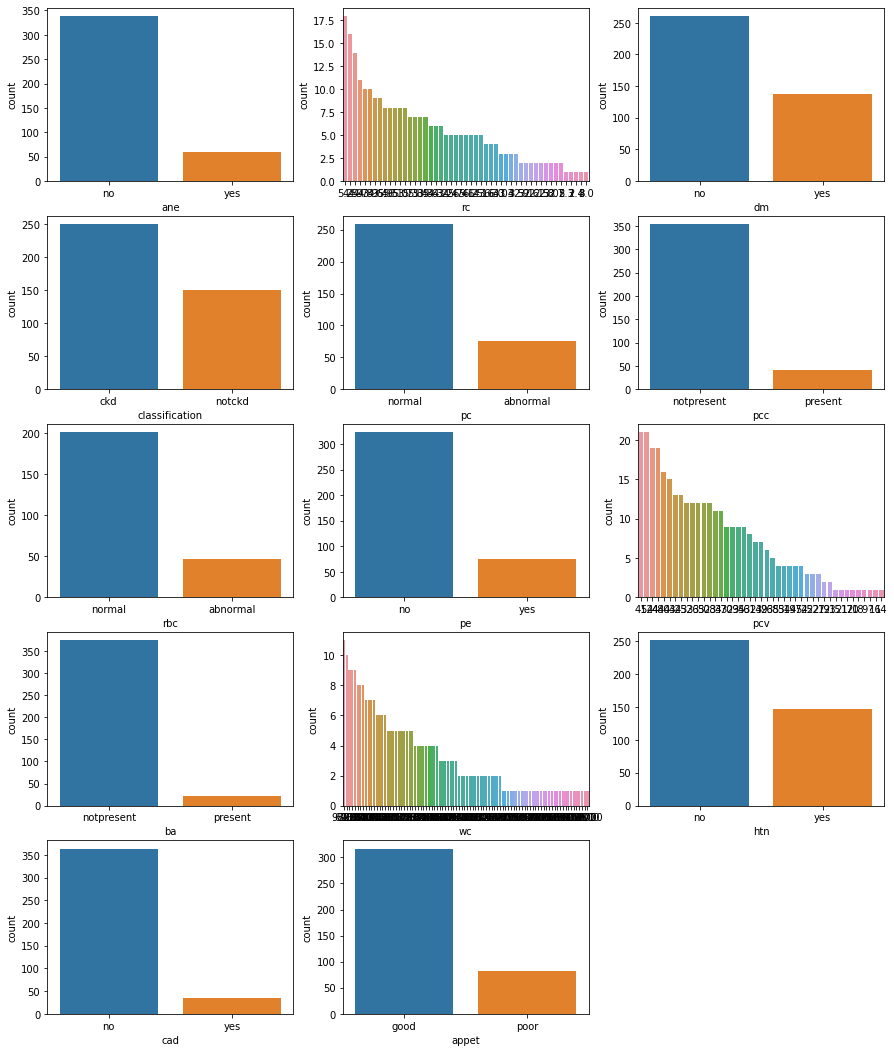

In [60]:
cols = df.columns
num_cols = df._get_numeric_data().columns
Categ_cols=list(set(cols) - set(num_cols))
lenght=len(Categ_cols)

plt.figure(figsize = (15,30))
for i in range (lenght):
    print('____________________________________________________________________________________')
    #Variable
    print('Variable name:' ,Categ_cols[i])
    #Unique values 
    print('Unique values are:', df[Categ_cols[i]].unique())
    #Number of unique values
    print('Number of unique values:',df[Categ_cols[i]].nunique())
    # Frequencies of categorical variables
    FreqValue=df[Categ_cols[i]].value_counts()
    print('Frequency of each unique value in a catagorical variable:')
    print(FreqValue)
    #Visualization of the categoricals data
    #fig = plt.figure(figsize=(10,6))
    plt.subplot(8,3,i+1)
    #plt.title(Categ_cols[i],fontsize=15)
    ax = sns.countplot(x=df[Categ_cols[i]],  order=df[Categ_cols[i]].value_counts(ascending=False).index);

In [13]:
pip install dabl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 558 kB 5.3 MB/s 


**An other visualization of the dataset using dabl package**

Target looks like classification
Linear Discriminant Analysis training set score: 0.980


[[<Figure size 1440x432 with 15 Axes>,
  <Figure size 1152x288 with 4 Axes>,
  <Figure size 1152x288 with 4 Axes>,
  <Figure size 432x288 with 1 Axes>],
 None]

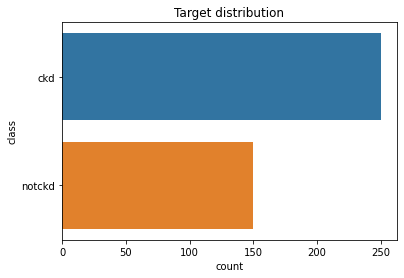

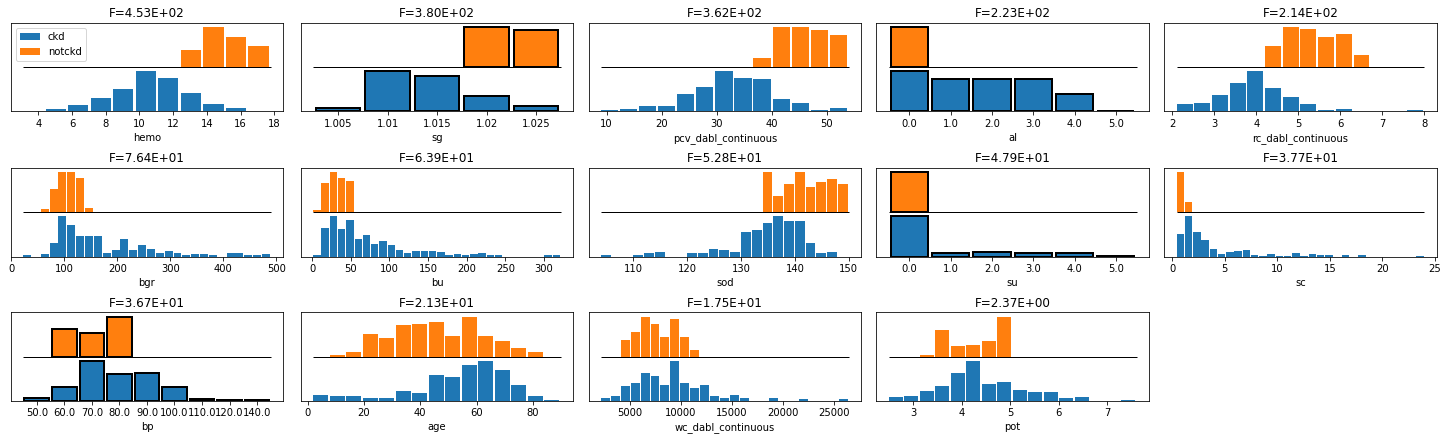

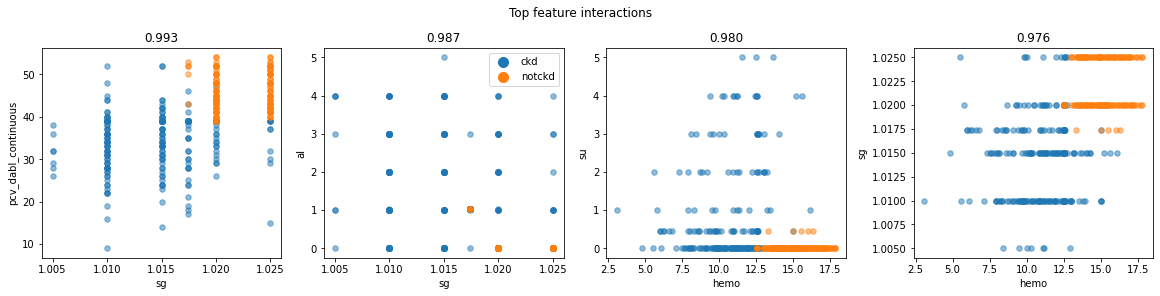

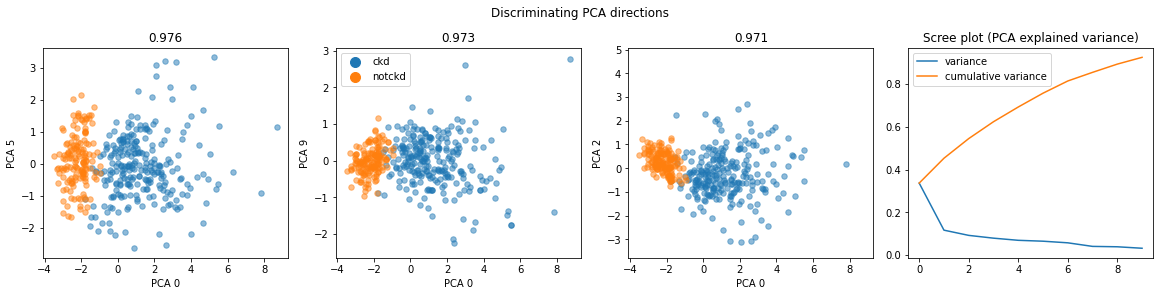

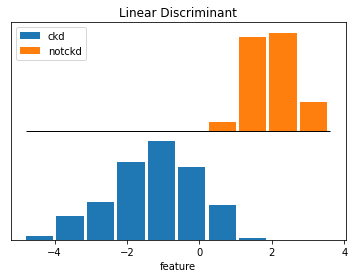

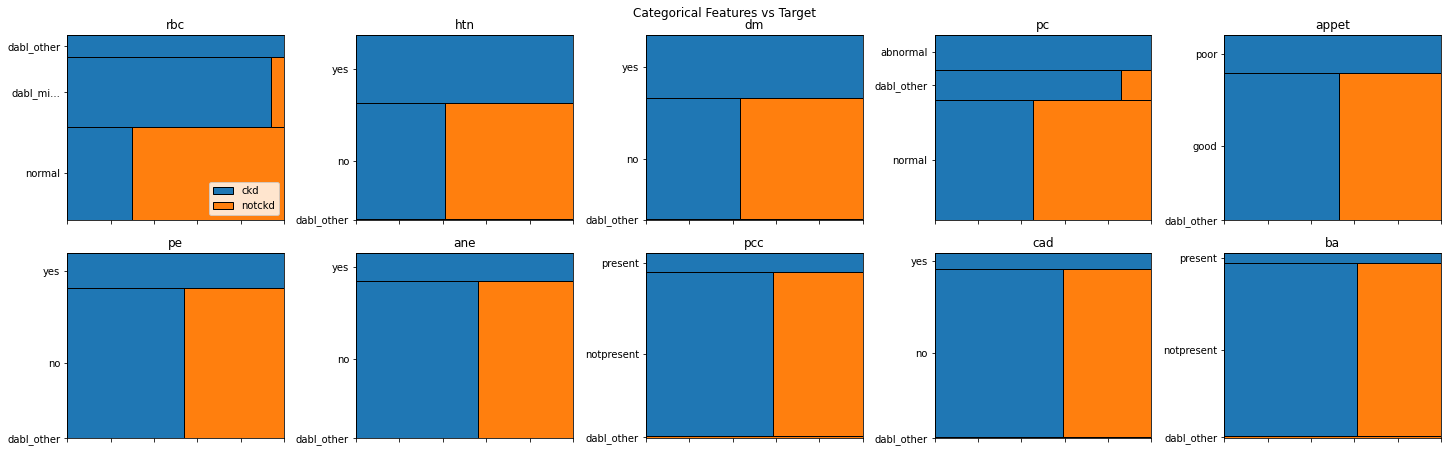

In [14]:
import dabl
dabl.plot(df,target_col='classification')

**Data preparation, mapping and cleanning**

In [61]:
# ----------------------------------MAPPING------------------------
df.replace("yes",1,inplace=True)
df.replace("no",0,inplace=True)

df.replace('notpresent',0, inplace=True)
df.replace('present',1,inplace=True)

df.replace('normal',0,inplace=True)
df.replace('abnormal',1, inplace=True)

df.replace('good',0,inplace=True)
df.replace('poor',1, inplace=True)

df.replace('notckd',0, inplace=True)
df.replace('ckd', 1, inplace=True)
df.replace('ckd\t' , 1, inplace=True)
# ----------------------------------Handling the missing values------------------------
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
id,,,,,,,,,,,,,,,,,,,,,
0,48.0,80.0,1.020,1.0,0.0,NaN,0.0,0.0,0.0,121.0,...,44,7800,5.2,1.0,1.0,0.0,0.0,0.0,0.0,1
1,7.0,50.0,1.020,4.0,0.0,NaN,0.0,0.0,0.0,NaN,...,38,6000,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.0,...,31,7500,NaN,0.0,1.0,0.0,1.0,0.0,1.0,1
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,...,32,6700,3.9,1.0,0.0,0.0,1.0,1.0,1.0,1
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.0,...,35,7300,4.6,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,140.0,...,47,6700,4.9,0.0,0.0,0.0,0.0,0.0,0.0,0
396,42.0,70.0,1.025,0.0,0.0,0.0,0.0,0.0,0.0,75.0,...,54,7800,6.2,0.0,0.0,0.0,0.0,0.0,0.0,0
397,12.0,80.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,100.0,...,49,6600,5.4,0.0,0.0,0.0,0.0,0.0,0.0,0


**Correlations**

In [55]:
print(df.columns)
import plotly
import plotly.express as px
fig = px.imshow(df.corr(),color_continuous_scale="Blues")
fig.show()

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')


**Prepare data,  target, training and testing data**

In [41]:
df['classification']

id
0      1
1      1
2      1
3      1
4      1
      ..
395    0
396    0
397    0
398    0
399    0
Name: classification, Length: 400, dtype: int64

In [62]:
#df = df.dropna()
print(df.shape)
target=df['classification']
df=df.drop(['classification'], axis=1)
X_train,X_test,y_train,y_test = train_test_split(df,target,test_size=.5,random_state=42)

(400, 25)


In [63]:
LogRegModel=LogisticRegression()
LogRegModel.fit(X_train, y_train)
y_pred_LogReg= LogRegModel.predict(X_test)

Accuracy_LogReg=accuracy_score(y_test, y_pred_LogReg)
print('accuracy Logistic regression:', Accuracy_LogReg*100)

# ------------------------Decision Tree-------------------
DecTree= DecisionTreeClassifier()
DecTree.fit(X_train, y_train)
y_pred_DecTree= DecTree.predict(X_test)

Accuracy_DecTree=accuracy_score(y_test, y_pred_DecTree)
print('accuracy Decision tree:', Accuracy_DecTree*100)


# ------------------------Random forest------------------
RandForest = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
RandForest.fit(X_train, y_train)
y_pred_RandForest= RandForest.predict(X_test)
Accuracy_RandForest=accuracy_score(y_test, y_pred_RandForest)
print('Random forest:', Accuracy_RandForest*100)

# ------------------------KnnC------------------

KNNc = KNeighborsClassifier(n_neighbors=3)
KNNc.fit(X_train, y_train)
y_pred_KNNc= KNNc.predict(X_test)

Accuracy_KNNc=accuracy_score(y_test, y_pred_KNNc)
print('KNNc:', Accuracy_KNNc*100)

votingCl = VotingClassifier(
    estimators=[('LogRegModel', LogRegModel), ('DecTree', DecTree),            
   ('RandForest', RandForest), ('KNNc', KNNc) ], voting = 'soft')
votingCl.fit(X_train, y_train)
votingCl.fit(X_train, y_train)
y_pred_votingCl= votingCl.predict(X_test)
Accuracy_votingCl=accuracy_score(y_test, y_pred_votingCl)
print('voting:', Accuracy_votingCl*100)

ValueError: ignored